In [1]:
from google.colab import files
uploaded = files.upload()

Saving AnscombeQuartet.txt to AnscombeQuartet.txt


In [0]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


In [4]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])
data.columns = header
data.index = [1,2,3,4,5,6,7,8,9,10,11]
data.head()

dat Dataset 1       Dataset 2       Dataset 3        Dataset 4      
val         x     y         x     y         x      y         x     y
1        10.0  8.04      10.0  9.14      10.0   7.46       8.0  6.58
2         8.0  6.95       8.0  8.14       8.0   6.77       8.0  5.76
3        13.0  7.58      13.0  8.74      13.0  12.74       8.0  7.71
4         9.0  8.81       9.0  8.77       9.0   7.11       8.0  8.84
5        11.0  8.33      11.0  9.26      11.0   7.81       8.0  8.47

In [0]:
#data.to_latex('hola.tex')

In [5]:
data.columns = ['$x_1$','$y_1$','$x_2$','$y_2$','$x_3$','$y_3$','$x_4$','$y_4$']
data.head()

,$x_1$,$y_1$,$x_2$,$y_2$,$x_3$,$y_3$,$x_4$,$y_4$
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47


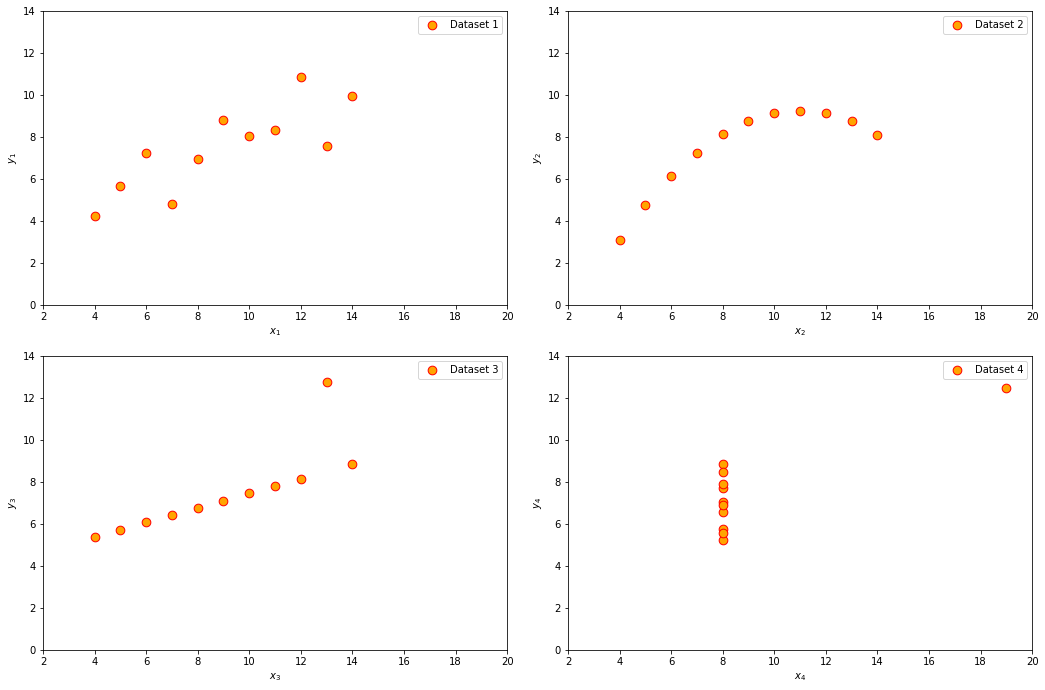

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
plt.tight_layout(pad=3.0)

parametros = {'marker':'o', 'c':'orange', 'edgecolor':'red', 's':75, 'xlim':[2,20], 'ylim':[0,14]}
data.plot.scatter('$x_1$','$y_1$', label='Dataset 1', ax=axes[0,0], **parametros)
data.plot.scatter('$x_2$','$y_2$', label='Dataset 2', ax=axes[0,1], **parametros)
data.plot.scatter('$x_3$','$y_3$', label='Dataset 3', ax=axes[1,0], **parametros)
data.plot.scatter('$x_4$','$y_4$', label='Dataset 4', ax=axes[1,1], **parametros)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lineas_regresion=[]
scores=[]

def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, i+1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression

    X_pred =np.arange(0,21,1)
    X_pred.shape = (-1,1)
    Y_pred = linear_regressor.predict(X_pred)  # make predictions

    linea="{:.2f} + {:.3f}x".format(linear_regressor.intercept_[0],linear_regressor.coef_[0][0])
    lineas_regresion.append(linea)
    scores.append("{:.2f}".format(linear_regressor.score(X, Y)))
    
    return X, Y, X_pred, Y_pred

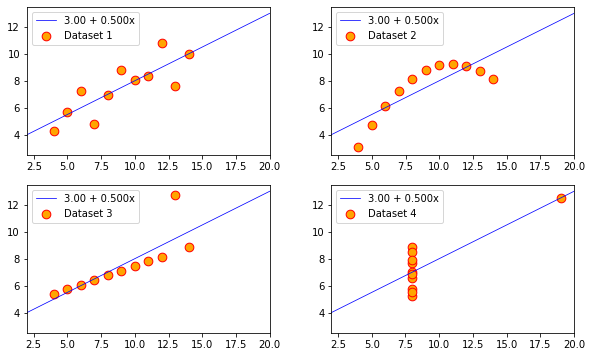

In [28]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
dataset=1
i = 0
for a in axes:
    for ax in a:
        #print("Dataset",dataset)
        X, Y, X_pred, Y_pred = regresionLineal(data, i)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red', label="Dataset {}".format(dataset))
        ax.plot(X_pred, Y_pred, color='blue', lw=0.75, label=lineas_regresion[dataset-1])
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        ax.legend()
        i += 2
        dataset+=1

In [0]:
#Tabla Resumen
indices=["Mean of x", "Sample variance of x", 
         "Mean of y", "Sample variance of y",
         "Correlation between x and y",
         "Linear Regresion Line",
         "Coefficiente of determination of linear regresion"
        ]
resumen = pd.DataFrame(np.zeros((7, 4)),index=indices)
resumen.columns=["Dataset 1","Dataset 2","Dataset 3","Dataset 4",]
#Medias de X
x_mean=[]
x_var=[]
for i in range(0,7,2):
    x_mean.append(data.iloc[:,i].mean())
    x_var.append(data.iloc[:,i].var())

resumen.iloc[0,:]=x_mean
resumen.iloc[1,:]=x_var

In [0]:
#Medias de Y
y_mean=[]
y_var=[]
for i in range(1,8,2):
    y_mean.append("{:.2f}".format(data.iloc[:,i].mean()))
    y_var.append("{:.3f}".format(data.iloc[:,i].var()))
    
resumen.iloc[2,:]=y_mean
resumen.iloc[3,:]=y_var

In [0]:
#Correlacion entre X y Y
cor=data.corr()
cor_x_y=[]
for i in range(0,7,2):
    cor_x_y.append("{:.3f}".format(cor.iloc[i,i+1]))

resumen.iloc[4,:]=cor_x_y

In [18]:
#Lineas de regresion y scores
resumen.iloc[5,:]=lineas_regresion
resumen.iloc[6,:]=scores
resumen

,Dataset 1,Dataset 2,Dataset 3,Dataset 4
Mean of x,9,9,9,9
Sample variance of x,11,11,11,11
Mean of y,7.50,7.50,7.50,7.50
Sample variance of y,4.127,4.128,4.123,4.123
Correlation between x and y,0.816,0.816,0.816,0.817
Linear Regresion Line,3.00 + 0.500x,3.00 + 0.500x,3.00 + 0.500x,3.00 + 0.500x
Coefficiente of determination of linear regresion,0.67,0.67,0.67,0.67


7.Completar el notebook "Anscombe.ipynb" con lo siguiente: (A) Su punto de vista del artículo mencionado en el punto 1 (particularmente de la sección 3)

La visulizacion de los datos nos dan un panorama general de la informacion. Herramientas como triple scatterplots nos ayuda a una mejor visualizacion de la informacion porque no solo nos muestra como se distribuyen los datos sino tambien que tanto peso (frecuencia) tienen.

La visulizacion tambien nos permite detectar anomalias que no siempre podemos percibir analiticamente porque a pesar de obtener un modelo puede que este no se ajuste a la tendencia de los datos. Dichas anomalias si no son producto de un error no deben eliminarse ya que se pierde informacion valiosa solo para que ajuste mejor el modelo, cada dato cuenta su propia historia y debe de considerarse para el analisis.
